In [2]:
#importing Libraries

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import *
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import *
import sklearn


from sklearn.metrics import *

import time
import math
import datetime

In [3]:
# Testing communication with internet
!wget "https://raw.githubusercontent.com/alfredofonseca/datasetMG/master/professoresDeduplicate.csv"


--2018-11-26 10:11:36--  https://raw.githubusercontent.com/alfredofonseca/datasetMG/master/professoresDeduplicate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65583108 (63M) [text/plain]
Saving to: ‘professoresDeduplicate.csv.33’

professoresDeduplic 100%[===================>]  62.54M  50.4MB/s    in 1.2s    

2018-11-26 10:11:38 (50.4 MB/s) - ‘professoresDeduplicate.csv.33’ saved [65583108/65583108]



In [4]:
DATA_URL = "https://raw.githubusercontent.com/alfredofonseca/datasetMG/master/professoresDeduplicate.csv"


In [5]:
columnNamesAll = ['id','name','state','efet','retirement','comi','inst','school','hour','remuner','teto','judic','ferias','decter','premio','feriasprem','jetons','eventual','ir','prev','rem_pos','contagem']

variableTarget = ['remuner']
categoricalVariables = ['state','efet','retirement','comi','inst','school']
numericVariables = ['hour']

#To test:
columnNames = categoricalVariables + numericVariables + variableTarget

print(columnNames)

['state', 'efet', 'retirement', 'comi', 'inst', 'school', 'hour', 'remuner']


In [6]:
# Read
df = pd.read_csv(DATA_URL, delimiter="|",names=columnNamesAll)
print("Data Shape: ", df.shape )


Data Shape:  (332108, 22)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df = df.filter(items=columnNames)
print("Data Shape: ", df.shape )

Data Shape:  (332108, 8)


In [8]:
# preview the data
df.head()


,state,efet,retirement,comi,inst,school,hour,remuner
0,ATIVO,PROFESSOR DE EDUCACAO BASICA,Nao,Nao,SECRETARIA DE EDUCACAO,EE AMERICA,21.0,2673.978000
1,ATIVO,PROFESSOR DE EDUCACAO BASICA,Nao,Nao,SECRETARIA DE EDUCACAO,EE BENEDITA CONCEICAO ROQUETTE,21.0,2284.221818
2,ATIVO,PROFESSOR DE EDUCACAO BASICA,Nao,Nao,SECRETARIA DE EDUCACAO,EE BENEDITO VALADARES,16.0,1524.481000
3,ATIVO,PROFESSOR DE EDUCACAO BASICA,Nao,Nao,SECRETARIA DE EDUCACAO,EE AFFONSO ROQUETTE,21.0,2052.130909
4,ATIVO,PROFESSOR DE EDUCACAO BASICA,Nao,Nao,SECRETARIA DE EDUCACAO,EE PE JOAO BALKER,21.0,2781.055455


# Exploration

In [9]:
df.hour.describe()


count    332101.000000
mean         17.461514
std          12.465593
min           0.000000
25%          12.000000
50%          21.000000
75%          21.000000
max         200.000000
Name: hour, dtype: float64

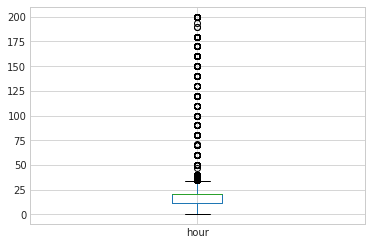

In [10]:
boxplot = df.boxplot(column=['hour'])


In [11]:
df.remuner.describe()

count    332108.000000
mean       1861.414519
std        1143.254068
min           0.010000
25%        1064.690000
50%        1933.254821
75%        2358.981864
max       29396.180000
Name: remuner, dtype: float64

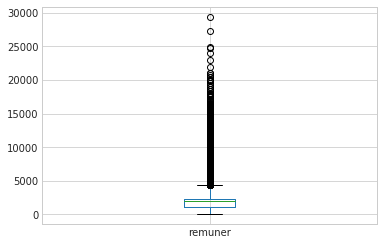

In [12]:
boxplot = df.boxplot(column=['remuner'])

# Missings

In [13]:
#Count missing:
def countMissing(field):
    count = 0
    for i in df[field].isnull():
        if(i):
            count += 1
    print(field,"has missing values:",count )
    

In [14]:
for nv in numericVariables:
    print("\n==== Numeric Variable:", nv)
    
    print("-- Before :")
    countMissing(nv)
    
    print("-- Transform :")
    mean_value = df[nv].mean()
    print("mean_value: ",mean_value)
    df[nv].fillna((mean_value), inplace=True)
    
    print("-- After :")
    countMissing(nv)
    


==== Numeric Variable: hour
-- Before :
hour has missing values: 7
-- Transform :
mean_value:  17.461513756357256
-- After :
hour has missing values: 0


In [15]:
for cv in categoricalVariables:
    print("\n==== Categorical Variable:", cv)
    
    print("-- Before :")
    countMissing(cv)
    
    print("-- Transform :")
    df[cv].fillna("Nao", inplace=True)
    
    print("-- After :")
    countMissing(cv)



==== Categorical Variable: state
-- Before :
state has missing values: 0
-- Transform :
-- After :
state has missing values: 0

==== Categorical Variable: efet
-- Before :
efet has missing values: 0
-- Transform :
-- After :
efet has missing values: 0

==== Categorical Variable: retirement
-- Before :
retirement has missing values: 0
-- Transform :
-- After :
retirement has missing values: 0

==== Categorical Variable: comi
-- Before :
comi has missing values: 0
-- Transform :
-- After :
comi has missing values: 0

==== Categorical Variable: inst
-- Before :
inst has missing values: 0
-- Transform :
-- After :
inst has missing values: 0

==== Categorical Variable: school
-- Before :
school has missing values: 0
-- Transform :
-- After :
school has missing values: 0


# Categories Encode

In [16]:
df = pd.get_dummies(data=df, columns=categoricalVariables)

# Split Data

In [17]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'remuner'] # All except remuner
y = df.loc[:,["remuner"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KeyError: MemoryError()

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

# Train Fuction

In [ ]:
def trainModel(regressor):
    
    start_time = time.time()
    
    print(" -- > Begin @ ", time.localtime( start_time  ) )  
    print(" -- > Regressor: ", regressor  )   
    
    regressor.fit(X_train, y_train)
    
    print(" -- > Time to fit : %s seconds " % (time.time() - start_time))
    
    predictions = regressor.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    print(" -- > MSE (Test Data): %.4f" % mse)
    
    rmse = math.sqrt(mse)
    print(" -- > RMSE (Test Data): %.4f" % rmse)
    
    r2 = r2_score(y_test, predictions)
    print(" -- > R2 (Test Data): %.4f" % r2)
    
    print(" -- > Total Time : %s seconds " % (time.time() - start_time))
    
    return regressor

# Decision Tree

In [ ]:
print("Decision Tree : max_depth 2")
#trainModel( DecisionTreeRegressor(max_depth=2) )

# -- > Time to fit : 14.857847929000854 seconds 
# -- > MSE (Test Data): 498488.4371
# -- > RMSE (Test Data): 706.0371
# -- > R2 (Test Data): 0.6152
# -- > Total Time : 17.5215003490448 seconds 


In [ ]:
print("Decision Tree : max_depth 10")
tree10 = trainModel( DecisionTreeRegressor(max_depth=10) )
# -- > Time to fit : 60.611958026885986 seconds 
# -- > MSE (Test Data): 352437.7142
# -- > RMSE (Test Data): 593.6646
# -- > R2 (Test Data): 0.7279
# -- > Total Time : 63.30974793434143 seconds 


print(tree10)

In [1]:
print("Decision Tree : max_depth 7")
#trainModel( DecisionTreeRegressor(max_depth=7) )


# -- > Time to fit : 42.798996448516846 seconds 
# -- > MSE (Test Data): 353376.6053
# -- > RMSE (Test Data): 594.4549
# -- > R2 (Test Data): 0.7272
# -- > Total Time : 45.43251085281372 seconds 

Decision Tree : max_depth 7


In [22]:
print("Decision Tree : max_depth 20")
#trainModel( DecisionTreeRegressor(max_depth=20) )

# -- > Time to fit : 115.14785122871399 seconds 
# -- > MSE (Test Data): 351975.5220
# -- > RMSE (Test Data): 593.2752
# -- > R2 (Test Data): 0.7283
# -- > Total Time : 117.83191323280334 seconds 

Decision Tree : max_depth 20


# Random Forest

In [23]:

print("Random Forest  : 10 20")
#trainModel( RandomForestRegressor(n_estimators=10, max_depth=20) )

# -- > Time to fit : 185.27394843101501 seconds 
# -- > MSE (Test Data): 359823.6480
# -- > RMSE (Test Data): 599.8530
# -- > R2 (Test Data): 0.7222
# -- > Total Time : 187.9854781627655 seconds 

Random Forest  : 10 20


In [24]:
print("Random Forest  : 100 7")
#trainModel( RandomForestRegressor(n_estimators=100, max_depth=20) )
# -- > Time to fit : 7302.1790199279785 seconds 
# -- > MSE (Test Data): 350787.0233
# -- > RMSE (Test Data): 592.2728
# -- > R2 (Test Data): 0.7292
# -- > Total Time : 7306.970707416534 seconds

Random Forest  : 100 7


# Boosted Decision Tree

In [25]:
print(" GBT : 20 7")
#trainModel( GradientBoostingRegressor(n_estimators=10, max_depth=7) )
# -- > Time to fit : 1371.2854018211365 seconds 
# -- > MSE (Test Data): 467256.8233
# -- > RMSE (Test Data): 683.5619
# -- > R2 (Test Data): 0.6393
# -- > Total Time : 1380.492726802826 seconds 

 GBT : 20 7


In [26]:
print(" GBT : 50 7")
#trainModel( GradientBoostingRegressor(n_estimators=50, max_depth=7) )
# -- > Time to fit : 5434.4936554431915 seconds 
# -- > MSE (Test Data): 348168.9103
# -- > RMSE (Test Data): 590.0584
# -- > R2 (Test Data): 0.7312
# -- > Total Time : 5443.927404880524 seconds 

 GBT : 50 7


In [ ]:
print(" GBT : 30 20")
#trainModel( GradientBoostingRegressor(n_estimators=30, max_depth=20) )

 GBT : 30 20
 -- > Begin @  time.struct_time(tm_year=2018, tm_mon=11, tm_mday=16, tm_hour=17, tm_min=13, tm_sec=24, tm_wday=4, tm_yday=320, tm_isdst=0)
 -- > Regressor:  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=20, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=30, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
